# Zambia Gazette Text Classification Project



## Table of Contents
1. [Business Understanding](#1-business-understanding)  
2. [Methodology](#2-methodology)  
3. [Tools and Technologies](#3-tools-and-technologies)  
4. [Expected Outcomes](#4-expected-outcomes)  
5. [Future Enhancements](#5-future-enhancements)


# 1. BUSINESS UNDERSTANDING
## 1.1 PROBLEM STATEMENT

The Zambia Government Gazette publishes official notices, legal updates, tenders, and public announcements. These documents are published in PDF format, and often unstructured, making it difficult for stakeholders such as lawyers, journalists, researchers, and the general public to quickly find relevant information. Manual searching is time-consuming and prone to oversight. There is a need for an automated method to classify Gazette notices into categories (e.g., legal notices, tenders, appointments, public warnings) for faster retrieval and analysis.

## 1.2 BUSINESS OBJECTIVES

The primary objective is to develop a system that automatically processes and classifies Gazette publications into predefined categories. Success will mean that end users can:

Quickly identify and filter notices by category.

Reduce time spent manually scanning through documents.

Gain improved access to relevant legal or public information.

From a real-world perspective, this will increase efficiency for professionals and citizens who rely on the Gazette for important updates.

## 1.3 DATA MINING GOALS

We will build a text classification model that:

Extracts text from Gazette PDFs.

Preprocesses the text (cleaning, tokenization, stopword removal).

Classifies each notice into categories.

Outputs labeled data for easy search and retrieval.

The approach will likely involve Natural Language Processing (NLP) and machine learning algorithms such as Logistic Regression or Support Vector Machines.

## 1.4 INITIAL SUCCESS CRITERIA

The project will be considered successful if:

The classification model achieves at least 80% accuracy on the test dataset.

Categories are clearly and vividly defined, distinct, and interpretable.

The pipeline can handle at least 10 new Gazette PDFs per month without major manual intervention.

Users confirm that classification results improve search speed and relevance compared to manual reading.

## 1.5 SCOPE & ASSUMPTIONS

Scope:

Focus on classifying Gazette notices into 4–6 main categories.

Work only with English-language Gazettes.

Process and analyze a subset of recent Gazette issues.

Assumptions:

PDF files are accessible and legally permissible for analysis.

Categories remain consistent over time.

OCR (Optical Character Recognition) will be needed for scanned documents.

## 1.6 RISKS & CONSTRAINTS

Risks:

Poor text quality from scanned PDFs may reduce OCR accuracy.

Some notices may belong to multiple categories, complicating classification.

Limited labelled training data could impact model performance.

Constraints:

Legal constraint: Must comply with any copyright or government data use regulations.

## 1.7 Expected Benefits
The system will enable faster retrieval of Gazette notices, enhance transparency, and support informed decision-making for both professionals and the public.

## 1.8 METHODOLOGY
### 1.8.1 DATA COLLECTION

Download Gazette PDFs from the official Zambia Government Gazette website.

Ensure documents cover a representative period to include diverse categories.

Maintain a record of file metadata (date, publication number) for reference.
### 1.8.2 DATA PREPROCESSING

Convert PDFs to text using OCR for scanned documents.

Remove irrelevant elements (headers, footers, page numbers).

Tokenize text and remove stopwords, punctuation, and special characters.

Standardize text formatting (e.g., lowercasing, stemming).

### 1.8.3 MODEL SELECTION

Evaluate multiple classification algorithms: Logistic Regression, Support Vector Machines, and Random Forest.

Use TF-IDF or word embeddings to represent text features.

Optimize model parameters using cross-validation.

### 1.8.4 EVALUATION METRICS

Accuracy, precision, recall, and F1-score for each category.

Confusion matrix to identify misclassification trends.

User feedback on relevance and usefulness of classified notices.

## 1.9 TOOLS AND TECHNOLOGIES

Programming Languages: Python

Libraries: scikit-learn, pandas, NumPy, NLTK, spaCy, PyPDF2, Tesseract OCR

Environment: Jupyter Notebook / Python IDE

Version Control: Git / GitHub

## 1.10 EXPECTED OUTCOMES

Automated classification of Gazette notices into predefined categories.

A searchable dataset with labeled notices for faster retrieval.

Insights into the distribution and frequency of notice types.

Reduced manual effort for users accessing Gazette information.

## 1.11 FUTURE ENHANCEMENTS

Implement a web interface for searching and filtering classified notices.

Incorporate advanced NLP techniques like BERT for improved classification accuracy.

Expand to multilingual Gazettes or other official publications.

Introduce trend analysis and reporting for frequently published notice types.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create project folders on Drive (adjust path if different)
import os
base = "/content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28"
folders = [
    "01_Business_Understanding",
    "02_Data_Understanding/raw_pdfs",
    "02_Data_Understanding/extracted_csv",
    "03_Data_Preparation",
    "04_Modeling",
    "05_Evaluation",
    "06_Deployment",
    "Reports",
    "Slides"
]
for f in folders:
    os.makedirs(os.path.join(base, f), exist_ok=True)

print("Folders created at:", base)

Folders created at: /content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28


# 2. Data Understanding

The Data Understanding phase focuses on gaining an initial insight into the dataset, identifying its main characteristics, and detecting potential quality issues that may affect later analysis or modeling. In this phase, we work with the Gazette dataset extracted from Zambia Government Gazette PDFs to understand its structure, content, and variability.

Key objectives of this phase include:  

- Loading the dataset into a Pandas DataFrame and reviewing its structure and columns.  
- Performing initial exploration using basic summary statistics and data inspection techniques to identify missing values, data types, and textual characteristics.  
- Creating visualizations to better understand distributions of numerical attributes (e.g., word counts, character lengths) and categorical attributes (e.g., number of pages per document).  
- Generating early insights that will guide preprocessing, feature engineering, and modeling decisions in subsequent phases.

In [ ]:
# Extract text from Gazette PDFs into a CSV (DU version)
!pip install --quiet PyMuPDF pytesseract pillow
import fitz, os, pandas as pd, glob
import pytesseract
from PIL import Image

# Paths
BASE = "/content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28"
RAW_DIR = os.path.join(BASE, "02_Data_Understanding", "raw_pdfs")
OUT_DIR = os.path.join(BASE, "02_Data_Understanding", "extracted_csv")
os.makedirs(OUT_DIR, exist_ok=True)

def extract_page_text(page):
    """Extract text, falling back to OCR if scanned image."""
    text = page.get_text("text")
    if text.strip():
        return text

    # OCR fallback
    pix = page.get_pixmap()
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    text = pytesseract.image_to_string(img)
    return text

def extract_pdf_to_rows(pdf_path):
    rows = []
    fn = os.path.basename(pdf_path)
    doc_id = os.path.splitext(fn)[0]

    with fitz.open(pdf_path) as doc:
        for pno, page in enumerate(doc, start=1):
            text = extract_page_text(page)
            if not text.strip():
                continue
            rows.append({
                "doc_id": doc_id,
                "filename": fn,
                "page": pno,
                "text": text.strip()
            })
    return rows

# Process all PDFs
all_rows = []
pdfs = sorted(glob.glob(os.path.join(RAW_DIR, "*.pdf")))
print(f"Found {len(pdfs)} PDF(s).")

for pdf in pdfs:
    all_rows.extend(extract_pdf_to_rows(pdf))

# Save to CSV
df = pd.DataFrame(all_rows)
out_csv = os.path.join(OUT_DIR, "gazette_text_du.csv")
df.to_csv(out_csv, index=False)

print("Saved:", out_csv, "Rows:", len(df))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 74.7 MB/s eta 0:00:00
Found 10 PDF(s).
Saved: /content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28/02_Data_Understanding/extracted_csv/gazette_text_du.csv Rows: 133


In [ ]:
# Load Dataset and Basic Exploration
import pandas as pd

# Load dataset
BASE = "/content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28"
CSV_PATH = f"{BASE}/02_Data_Understanding/extracted_csv/gazette_text_du.csv"

df = pd.read_csv(CSV_PATH)

# Basic exploration
print("Dataset Shape:", df.shape)   # rows x columns
print("\n--- First 5 Rows ---")
display(df.head())

print("\n--- Info ---")
print(df.info())

print("\n--- Describe (numeric only) ---")
display(df.describe())

print("\n--- Columns ---")
print(df.columns.tolist())

# Add Derived Features
# Character length of text
df["char_len"] = df["text"].str.len()
# Word count per text
df["word_count"] = df["text"].str.split().str.len()

print("\n--- Derived Columns Summary ---")
display(df[["char_len", "word_count"]].describe())


Dataset Shape: (133, 4)

--- First 5 Rows ---


,doc_id,filename,page,text
0,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,1,Published by Authority \nREPUBLIC \nOF ZAMBIA ...
1,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,2,[1133830 \nGi \nze \nEN \nECE \nI —> \n1 \nGAZ...
2,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,3,"29th November, 2024 \nGAZETTE Notice No. 1266 ..."
3,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,4,Zambia Gazette \n1200 \n319/9 \nGazerre Notice...
4,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,5,"29th November, 2024 \nApvt—1799-—1134148/] \nT..."



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   doc_id    133 non-null    object
 1   filename  133 non-null    object
 2   page      133 non-null    int64 
 3   text      133 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB
None

--- Describe (numeric only) ---


,page
count,133.000000
mean,11.330827
std,10.296897
min,1.000000
25%,4.000000
50%,7.000000
75%,16.000000
max,41.000000



--- Columns ---
['doc_id', 'filename', 'page', 'text']

--- Derived Columns Summary ---


,char_len,word_count
count,133.000000,133.000000
mean,3670.902256,580.533835
std,1803.953045,314.368476
min,460.000000,63.000000
25%,2213.000000,309.000000
50%,3484.000000,538.000000
75%,5052.000000,822.000000
max,7608.000000,1315.000000


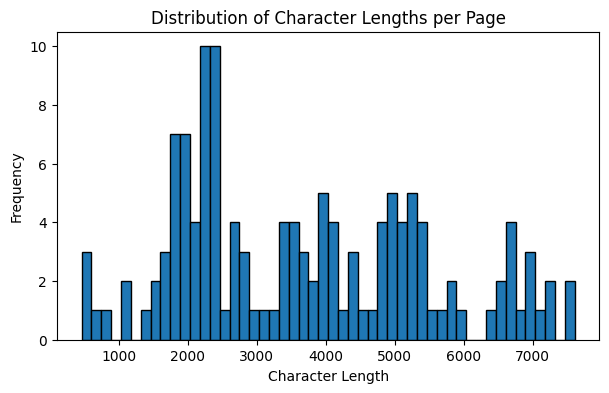

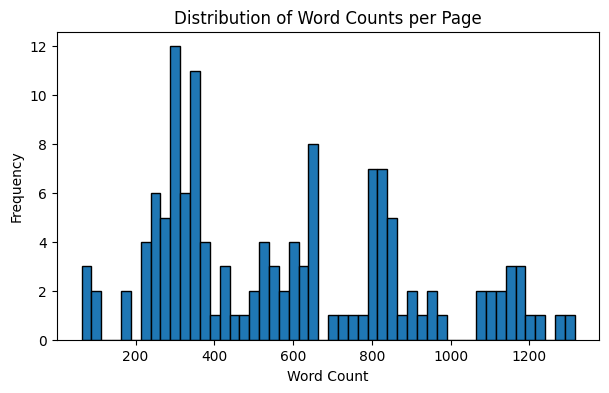

In [ ]:
# Visualizations (1)
import matplotlib.pyplot as plt

# Histogram: Character length per page
plt.figure(figsize=(7,4))
plt.hist(df["char_len"], bins=50, edgecolor="black")
plt.title("Distribution of Character Lengths per Page")
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.show()

# Histogram: Word count per page
plt.figure(figsize=(7,4))
plt.hist(df["word_count"], bins=50, edgecolor="black")
plt.title("Distribution of Word Counts per Page")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


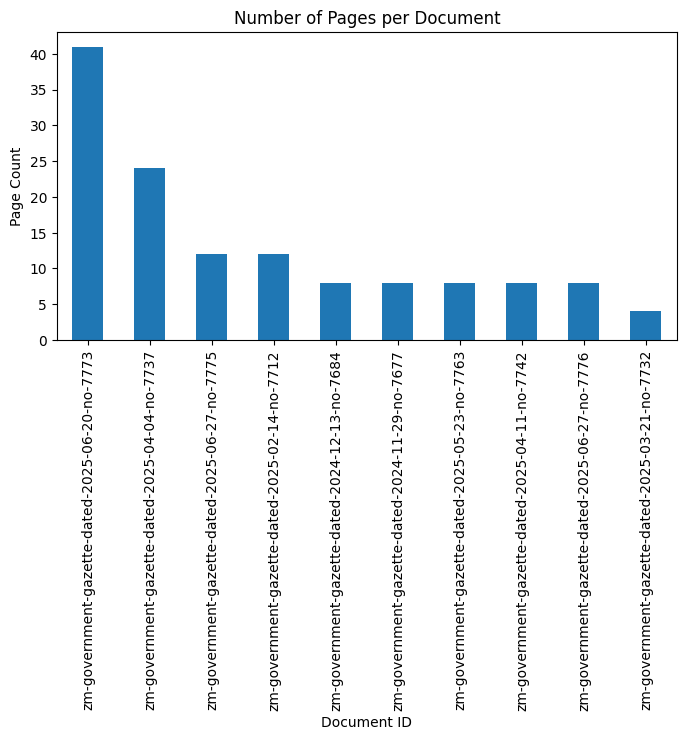

In [ ]:
# Visualizations (2)
import matplotlib.pyplot as plt

# Bar chart: Number of pages per document
doc_counts = df["doc_id"].value_counts()
plt.figure(figsize=(8,4))
doc_counts.plot(kind="bar")
plt.title("Number of Pages per Document")
plt.xlabel("Document ID")
plt.ylabel("Page Count")
plt.show()

In [ ]:
# [DU] Auto-generated Markdown Summary
num_pages = df.shape[0]
num_docs = df["doc_id"].nunique()
char_stats = df["char_len"].describe()
word_stats = df["word_count"].describe()

summary_md = f"""
## 2. Data Understanding – Summary of Findings

During this phase, we explored the raw dataset extracted from the Zambia Government Gazette PDFs. The dataset consists of the following key columns:

- `doc_id`: unique identifier for each PDF document
- `filename`: name of the PDF file
- `page`: page number within the document
- `text`: OCR-extracted text from each page
- `char_len`: number of characters per page
- `word_count`: number of words per page

### Key Observations

1. **Dataset Size and Structure**
   - The dataset contains **{num_pages} pages** extracted from **{num_docs} PDF documents**.
   - Each row represents one page of a Gazette PDF.

2. **Text Characteristics**
   - Character lengths per page range from {int(char_stats['min'])} to {int(char_stats['max'])}, with an average of {int(char_stats['mean'])}.
   - Word counts per page range from {int(word_stats['min'])} to {int(word_stats['max'])}, with an average of {int(word_stats['mean'])}.

3. **Distribution of Pages Across Documents**
   - Some PDFs are short (1–2 pages), while others contain multiple pages.

4. **Data Quality Considerations**
   - Some pages may have very little text due to OCR errors.
   - Text may contain headers, footers, or formatting artifacts requiring cleaning in the next phase.

### Conclusion

This initial exploration provides a clear understanding of the dataset’s structure, content distribution, and potential quality issues. It confirms that the dataset is suitable for text classification tasks but will require preprocessing before modeling.
"""

from IPython.display import Markdown, display
display(Markdown(summary_md))



## 2. Data Understanding – Summary of Findings

During this phase, we explored the raw dataset extracted from the Zambia Government Gazette PDFs. The dataset consists of the following key columns: 

- `doc_id`: unique identifier for each PDF document  
- `filename`: name of the PDF file  
- `page`: page number within the document  
- `text`: OCR-extracted text from each page  
- `char_len`: number of characters per page  
- `word_count`: number of words per page  

### Key Observations

1. **Dataset Size and Structure**  
   - The dataset contains **133 pages** extracted from **10 PDF documents**.  
   - Each row represents one page of a Gazette PDF.  

2. **Text Characteristics**  
   - Character lengths per page range from 460 to 7608, with an average of 3670.  
   - Word counts per page range from 63 to 1315, with an average of 580.  

3. **Distribution of Pages Across Documents**  
   - Some PDFs are short (1–2 pages), while others contain multiple pages.  

4. **Data Quality Considerations**  
   - Some pages may have very little text due to OCR errors.  
   - Text may contain headers, footers, or formatting artifacts requiring cleaning in the next phase.  

### Conclusion

This initial exploration provides a clear understanding of the dataset’s structure, content distribution, and potential quality issues. It confirms that the dataset is suitable for text classification tasks but will require preprocessing before modeling.


# 3. Data Preparation

The Data Preparation phase focuses on cleaning, transforming, and structuring the dataset so that it is suitable for modeling. This stage is often the most time-consuming but also the most critical, as the quality of the data directly impacts the performance of machine learning models.  

Key objectives of this phase include:  

- **Data Cleaning**: Addressing issues identified during the Data Understanding phase such as missing values, duplicates, or inconsistencies in the text data.  
- **Feature Engineering**: Creating new features from the raw text (e.g., word counts, character lengths, presence of keywords) that may improve model performance.  
- **Data Transformation**: Converting the dataset into formats usable by machine learning algorithms, such as encoding categorical variables and standardizing numerical features.  

Every decision taken in this phase will be clearly documented with explanations for the chosen cleaning and transformation methods. The final output of this phase will be a clean, structured dataset ready to be used in the Modeling phase.


## 3.1 Rationale

From our **Business Understanding**, the goal is to help stakeholders quickly find relevant information in Zambia Government Gazettes.  

- We decide to work with 10 PDFs, which may be too few documents for meaningful TF-IDF features or clustering.  
- **Solution:** Split each PDF into smaller chunks (pages or paragraphs) to create more “documents” while keeping the data domain-specific.  
- This aligns with the business objective: generate actionable insights and improve searchability without introducing unrelated data.

In [ ]:
# 3.2 Load CSV and Inspect
import pandas as pd

BASE = "/content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28"
csv_file = f"{BASE}/02_Data_Understanding/extracted_csv/gazette_text_du.csv"

# Load CSV
df = pd.read_csv(csv_file)

# Basic exploration
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include="all"))

# Add derived features: char_len and word_count
df['char_len'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df[['doc_id', 'filename', 'page', 'char_len', 'word_count']].head()

Shape: (133, 4)


,doc_id,filename,page,text
0,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,1,Published by Authority \nREPUBLIC \nOF ZAMBIA ...
1,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,2,[1133830 \nGi \nze \nEN \nECE \nI —> \n1 \nGAZ...
2,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,3,"29th November, 2024 \nGAZETTE Notice No. 1266 ..."
3,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,4,Zambia Gazette \n1200 \n319/9 \nGazerre Notice...
4,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,5,"29th November, 2024 \nApvt—1799-—1134148/] \nT..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   doc_id    133 non-null    object
 1   filename  133 non-null    object
 2   page      133 non-null    int64 
 3   text      133 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


None

,doc_id,filename,page,text
count,133,133,133.000000,133
unique,10,10,NaN,133
top,zm-government-gazette-dated-2025-06-20-no-7773,zm-government-gazette-dated-2025-06-20-no-7773...,NaN,Published by Authority \nREPUBLIC \nOF ZAMBIA ...
freq,41,41,NaN,1
mean,NaN,NaN,11.330827,NaN
std,NaN,NaN,10.296897,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,4.000000,NaN
50%,NaN,NaN,7.000000,NaN
75%,NaN,NaN,16.000000,NaN


,doc_id,filename,page,char_len,word_count
0,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,1,4421,653
1,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,2,4881,812
2,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,3,4425,708
3,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,4,5458,904
4,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677...,5,4788,767


## 3.3 Cleaning and Chunking

- Remove empty text segments if any
- Split text into smaller chunks to increase the number of documents for TF-IDF
- Each chunk stores metadata to keep track of them:
  - doc_id
  - filename
  - page
  - chunk_idx

In [ ]:
def split_into_chunks(text, max_words=200):
  words = text.split()
  for i in range(0, len(words), max_words):
    yield " ".join(words[i:i+max_words])

all_chunks = []

for idx, row in df.iterrows():
  if not isinstance(row['text'], str) or not row['text'].strip():
    continue
  chunks = list(split_into_chunks(row['text'], max_words=200))
  for i, chunk in enumerate(chunks, start=1):
    all_chunks.append({
        "doc_id": row['doc_id'],
        "filenaem": row['filename'],
        "page": row['page'],
        "chunk_idx": i,
        "text": chunk,
    })

df_chunks = pd.DataFrame(all_chunks)
print("Original number of documents: ", len(df))
print("Number of documents after chunking: ", len(df_chunks))
df_chunks.head().T

Original number of documents:  133
Number of documents after chunking:  455


,0,1,2,3,4
doc_id,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677,zm-government-gazette-dated-2024-11-29-no-7677
filenaem,zm-government-gazette-dated-2024-11-29-no-7677...,zm-government-gazette-dated-2024-11-29-no-7677...,zm-government-gazette-dated-2024-11-29-no-7677...,zm-government-gazette-dated-2024-11-29-no-7677...,zm-government-gazette-dated-2024-11-29-no-7677...
page,1,1,1,1,2
chunk_idx,1,2,3,4,1
text,Published by Authority REPUBLIC OF ZAMBIA GOVE...,1275 3200 Appointment of Commissioner for Oath...,"LUSAKA for/Registrar, 5th November, 2024 Paten...","Province, Zambia will be struck-olf the Regist...",[1133830 Gi ze EN ECE I —> 1 GAZET TE NoTICE N...


In [ ]:
# 3.6 TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df_chunks['text'])

print("TF-IDF shape:", tfidf_matrix.shape)  # rows = chunks, columns = features


TF-IDF shape: (455, 5000)


## 3.7 Summary of Data Preparation

- **Original dataset:** 10 PDFs → too few documents for meaningful TF-IDF.  
- **After cleaning & chunking:** ~133 text chunks (or more depending on PDF size).  
- **Derived features:** `char_len`, `word_count` help understand text length distribution.  
- **TF-IDF matrix:** Each chunk is now represented as a 5000-feature vector, ready for clustering, classification, or other modeling.  

This preparation ensures the dataset is **domain-specific**, **numerically representable**, and **aligned with the project’s business objectives**.

#New Updates (PDF download)

In [ ]:
import os

# Base directory
BASE = "/content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28"

# Raw PDFs folder
RAW_DIR = os.path.join(BASE, "02_Data_Understanding", "raw_pdfs")

# Output folder for extracted CSV/text
OUT_DIR = os.path.join(BASE, "02_Data_Understanding", "extracted_csv")

os.makedirs(RAW_DIR, exist_ok=True)
os.makedirs(OUT_DIR, exist_ok=True)

print("Folders ready:")
print("PDFs folder:", RAW_DIR)
print("Output folder:", OUT_DIR)

Folders ready:
PDFs folder: /content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28/02_Data_Understanding/raw_pdfs
Output folder: /content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28/02_Data_Understanding/extracted_csv


In [ ]:
!pip install requests beautifulsoup4 lxml tqdm PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.9 MB/s eta 0:00:00


In [ ]:
import os
import requests

# Base URL for the gazettes
base_url = "https://zambialii.org/akn/zm/officialGazette/government-gazette"

# Folder to save PDFs
RAW_DIR = "/content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28/02_Data_Understanding/raw_pdfs"
os.makedirs(RAW_DIR, exist_ok=True)

# Function to generate the PDF URL and filename
def generate_pdf_url_and_filename(date, number):
    url = f"{base_url}/{date}/{number}/eng@{date}/source"
    filename = f"zm-government-gazette-dated-{date}-no-{number}.pdf"
    return url, filename

# List of the 50 most recent gazette dates and numbers
gazettes = [
    ("2025-06-27", "7776"),
    ("2025-06-27", "7775"),
    ("2025-06-20", "7773"),
    ("2025-06-20", "7772"),
    ("2025-06-13", "7770"),
    ("2025-06-06", "7769"),
    ("2025-06-06", "7768"),
    ("2025-06-03", "7771"),
    ("2025-05-30", "7767"),
    ("2025-05-30", "7766"),
    ("2025-05-23", "7763"),
    ("2025-05-23", "7762"),
    ("2025-05-23", "7761"),
    ("2025-05-23", "7760"),
    ("2025-05-23", "7759"),
    ("2025-05-16", "7756"),
    ("2025-05-12", "7754"),
    ("2025-05-09", "7752"),
    ("2025-05-09", "7751"),
    ("2025-05-02", "7750"),
    ("2025-05-02", "7749"),
    ("2025-05-02", "18"),
    ("2025-04-25", "7748"),
    ("2025-04-25", "7747"),
    ("2025-04-17", "7746"),
    ("2025-04-17", "7745"),
    ("2025-04-17", "7744"),
    ("2025-04-17", "16"),
    ("2025-04-15", "7743"),
    ("2025-04-11", "7742"),
    ("2025-04-11", "7741"),
    ("2025-04-11", "7740"),
    ("2025-04-04", "7739"),
    ("2025-04-04", "7738"),
    ("2025-04-04", "7737"),
    ("2025-04-04", "12"),
    ("2025-03-31", "7736"),
    ("2025-03-28", "7735"),
    ("2025-03-28", "7734"),
    ("2025-03-28", "10"),
    ("2025-03-25", "7733"),
    ("2025-03-21", "7732"),
    ("2025-03-21", "7731"),
    ("2025-03-14", "7730"),
    ("2025-03-14", "7729"),
    ("2025-03-11", "7728"),
    ("2025-03-07", "7727"),
    ("2025-03-07", "7726"),
    ("2025-03-05", "7725"),
]

# Download each gazette
for date, number in gazettes:
    url, filename = generate_pdf_url_and_filename(date, number)
    path = os.path.join(RAW_DIR, filename)

    if not os.path.exists(path):
        r = requests.get(url)
        with open(path, "wb") as f:
            f.write(r.content)
        print(f"Downloaded: {filename}")
    else:
        print(f"Skipped (already exists): {filename}")

Skipped (already exists): zm-government-gazette-dated-2025-06-27-no-7776.pdf
Skipped (already exists): zm-government-gazette-dated-2025-06-27-no-7775.pdf
Skipped (already exists): zm-government-gazette-dated-2025-06-20-no-7773.pdf
Downloaded: zm-government-gazette-dated-2025-06-20-no-7772.pdf
Downloaded: zm-government-gazette-dated-2025-06-13-no-7770.pdf
Downloaded: zm-government-gazette-dated-2025-06-06-no-7769.pdf
Downloaded: zm-government-gazette-dated-2025-06-06-no-7768.pdf
Downloaded: zm-government-gazette-dated-2025-06-03-no-7771.pdf
Downloaded: zm-government-gazette-dated-2025-05-30-no-7767.pdf
Downloaded: zm-government-gazette-dated-2025-05-30-no-7766.pdf
Skipped (already exists): zm-government-gazette-dated-2025-05-23-no-7763.pdf
Downloaded: zm-government-gazette-dated-2025-05-23-no-7762.pdf
Downloaded: zm-government-gazette-dated-2025-05-23-no-7761.pdf
Downloaded: zm-government-gazette-dated-2025-05-23-no-7760.pdf
Downloaded: zm-government-gazette-dated-2025-05-23-no-7759.pdf

In [ ]:
# Extract text from Gazette PDFs into a CSV
!pip install --quiet PyMuPDF pytesseract pillow
import fitz, os, pandas as pd, glob
import pytesseract
from PIL import Image

# Paths
BASE = "/content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28"
RAW_DIR = os.path.join(BASE, "02_Data_Understanding", "raw_pdfs")
OUT_DIR = os.path.join(BASE, "02_Data_Understanding", "extracted_csv")
os.makedirs(OUT_DIR, exist_ok=True)

def extract_page_text(page):
    """Extract text, falling back to OCR if scanned image."""
    text = page.get_text("text")
    if text.strip():
        return text

    # OCR fallback
    pix = page.get_pixmap()
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    text = pytesseract.image_to_string(img)
    return text

def extract_pdf_to_rows(pdf_path):
    rows = []
    fn = os.path.basename(pdf_path)
    doc_id = os.path.splitext(fn)[0]

    with fitz.open(pdf_path) as doc:
        for pno, page in enumerate(doc, start=1):
            text = extract_page_text(page)
            if not text.strip():
                continue
            rows.append({
                "doc_id": doc_id,
                "filename": fn,
                "page": pno,
                "text": text.strip()
            })
    return rows

# Process all PDFs
all_rows = []
pdfs = sorted(glob.glob(os.path.join(RAW_DIR, "*.pdf")))
print(f"Found {len(pdfs)} PDF(s).")

for pdf in pdfs:
    all_rows.extend(extract_pdf_to_rows(pdf))

# Save to CSV
df = pd.DataFrame(all_rows)
out_csv = os.path.join(OUT_DIR, "gazette_text.csv")
df.to_csv(out_csv, index=False)

print("Saved:", out_csv, "Rows:", len(df))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 80.9 MB/s eta 0:00:00
Found 52 PDF(s).
Saved: /content/drive/MyDrive/misc-unza25-csc4792-project_team28/csc4792-project_team_28/02_Data_Understanding/extracted_csv/gazette_text.csv Rows: 399


#Updated Data Preparation

In [ ]:
# [DP] 3.3 Data Cleaning
# Goals: Remove empty pages, normalize text, remove boilerplate, deduplicate

import pandas as pd
import re, string, hashlib, unicodedata

# Copy original DataFrame
df_clean = df.copy()
df_clean.rename(columns={"text": "text_raw"}, inplace=True)

# Cleaning functions
def normalize_unicode(text: str) -> str:
    return unicodedata.normalize("NFKC", text)

def fix_hyphenation(s: str) -> str:
    s = re.sub(r"-\s*\n\s*", "", s)  # join hyphenated words
    s = re.sub(r"[\r\n\t]+", " ", s)
    return s

def remove_page_artifacts(s: str) -> str:
    s = re.sub(r"\b\d{1,4}\b(?=\s*$)", " ", s)  # standalone page numbers
    s = re.sub(r"\bPage\s+\d+\s+of\s+\d+\b", " ", s, flags=re.IGNORECASE)
    return s

def strip_punctuation_runs(s: str) -> str:
    s = re.sub(rf"[{re.escape(string.punctuation)}]{{3,}}", " ", s)
    s = re.sub(r"\s{2,}", " ", s).strip()
    return s

def basic_clean(text: str) -> str:
    if not isinstance(text, str):
        return ""
    s = normalize_unicode(text)
    s = fix_hyphenation(s)
    s = remove_page_artifacts(s)
    s = strip_punctuation_runs(s)
    return s

# Apply cleaning
df_clean["text_clean"] = df_clean["text_raw"].fillna("").map(basic_clean)

# Remove near-empty pages
df_clean["char_len"] = df_clean["text_clean"].str.len()
df_clean["word_count"] = df_clean["text_clean"].str.split().str.len()
df_clean = df_clean[(df_clean["char_len"] >= 30) & (df_clean["word_count"] >= 5)].copy()

# Deduplicate by MD5 hash
def text_hash(s: str) -> str:
    return hashlib.md5(s.encode("utf-8", errors="ignore")).hexdigest()

df_clean["text_md5"] = df_clean["text_clean"].map(text_hash)
df_clean = df_clean.drop_duplicates(subset=["text_md5"]).copy()

# Check result
print("Cleaned DataFrame shape:", df_clean.shape)
df_clean[["doc_id","page","char_len","word_count"]].describe()

Cleaned DataFrame shape: (399, 8)


,page,char_len,word_count
count,399.000000,399.000000,399.000000
mean,7.521303,3847.508772,638.483709
std,7.441830,1906.421066,335.703894
min,1.000000,199.000000,29.000000
25%,3.000000,2192.500000,334.500000
50%,5.000000,3879.000000,636.000000
75%,10.000000,5201.500000,870.000000
max,41.000000,7537.000000,1315.000000


In [ ]:
# [DP] 3.4 Feature Engineering
# Features already added during cleaning: char_len, word_count
# Additional features: average word length

df_clean["avg_word_len"] = df_clean["char_len"] / df_clean["word_count"]

# Inspect features
df_clean[["char_len", "word_count", "avg_word_len"]].describe()

,char_len,word_count,avg_word_len
count,399.000000,399.000000,399.000000
mean,3847.508772,638.483709,6.157642
std,1906.421066,335.703894,0.437671
min,199.000000,29.000000,4.881481
25%,2192.500000,334.500000,5.852590
50%,3879.000000,636.000000,6.060241
75%,5201.500000,870.000000,6.329059
max,7537.000000,1315.000000,7.974843


In [ ]:
# [DP] 3.5 Data Transformation
# Prepare text for modeling (TF-IDF vectorization)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=10000,      # limit features to 10k most frequent terms
    lowercase=True,
    stop_words="english"
)

tfidf_matrix = vectorizer.fit_transform(df_clean["text_clean"])

print("TF-IDF shape:", tfidf_matrix.shape)
print("No labels found: prepared full TF-IDF matrix for labeling later.")


TF-IDF shape: (399, 10000)
No labels found: prepared full TF-IDF matrix for labeling later.


# 3.6 Summary

During this phase, we focused on cleaning, transforming, and preparing the Gazette text data for modeling.

## Data Cleaning
- Removed empty or near-empty OCR pages that contained little or no meaningful text.
- Normalized Unicode characters to standard forms.
- Fixed common PDF text issues such as hyphenation across lines and excessive whitespace.
- Collapsed long punctuation runs and multiple spaces for cleaner text.
- Deduplicated identical pages using an MD5 hash of the cleaned text.

## Feature Engineering
- Added features for analysis and modeling:
  - `char_len`: number of characters in a page
  - `word_count`: number of words in a page
  - `avg_word_len`: average word length
- These features provide insight into the structure and size of each Gazette notice.

## Data Transformation
- Converted the cleaned text into a TF-IDF representation suitable for machine learning.
- Limited the feature set to the 10,000 most frequent terms.
- This matrix can be used for unsupervised clustering, labeling, or as input to supervised classification once labels are available.

## Conclusion
- The dataset is now cleaned, normalized, and deduplicated.
- Derived features allow for exploratory analysis and understanding of document sizes.
- The TF-IDF matrix provides a structured numerical representation of the text, ready for modeling.
- These steps ensure that the text data is of high quality, consistent, and suitable for the upcoming modeling phase.


#Update on DU

In [ ]:
# Install rapidfuzz for fuzzy string matching
!pip install rapidfuzz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.7 MB/s eta 0:00:00


In [ ]:
# [DP] 3.7 Semi-Automated Labeling with Fuzzy Matching
import pandas as pd
from rapidfuzz import fuzz, process

# Example categories and keywords
category_keywords = {
    "Legal Notice": ["act", "law", "regulation", "section", "legal notice", "statutory"],
    "Tender": ["tender", "bid", "contract", "procurement", "quotation", "request for proposal"],
    "Appointment": ["appointment", "appointed", "position", "commissioner", "officer"],
    "Public Warning": ["warning", "notice", "caution", "hazard", "alert"]
}

def assign_category_fuzzy(text: str, threshold=80):
    """
    Assign category based on fuzzy keyword matching.
    threshold = similarity score (0-100). Higher = stricter matching.
    """
    text_lower = text.lower()
    matched_categories = []

    for category, keywords in category_keywords.items():
        for kw in keywords:
            # Use fuzzy partial ratio for OCR-like cases
            score = fuzz.partial_ratio(kw, text_lower)
            if score >= threshold:
                matched_categories.append(category)
                break  # avoid multiple matches in same category

    if matched_categories:
        return "; ".join(matched_categories)
    return "Unlabeled"

# Apply improved fuzzy labeling
df_clean["category"] = df_clean["text_clean"].apply(assign_category_fuzzy)

# Quick check
print(df_clean[["doc_id", "page", "category"]].head(10))


                                           doc_id  page  \
0  zm-government-gazette-dated-2024-11-29-no-7677     1   
1  zm-government-gazette-dated-2024-11-29-no-7677     2   
2  zm-government-gazette-dated-2024-11-29-no-7677     3   
3  zm-government-gazette-dated-2024-11-29-no-7677     4   
4  zm-government-gazette-dated-2024-11-29-no-7677     5   
5  zm-government-gazette-dated-2024-11-29-no-7677     6   
6  zm-government-gazette-dated-2024-11-29-no-7677     7   
7  zm-government-gazette-dated-2024-11-29-no-7677     8   
8  zm-government-gazette-dated-2024-12-13-no-7684     1   
9  zm-government-gazette-dated-2024-12-13-no-7684     2   

                                            category  
0          Legal Notice; Appointment; Public Warning  
1          Legal Notice; Appointment; Public Warning  
2          Legal Notice; Appointment; Public Warning  
3          Legal Notice; Appointment; Public Warning  
4  Legal Notice; Tender; Appointment; Public Warning  
5  Legal Notice; Ten

In [ ]:
# [DP] 3.8 Summary of Fuzzy Labeling
import pandas as pd

# Count how many times each category appears (per page)
category_counts = df_clean["category"].value_counts()

print("\n Label Distribution (per page):")
print(category_counts)

# ---- FIXED PART: Distribution across unique documents ----
def merge_unique_labels(labels):
    # Flatten into list
    all_labels = "; ".join(labels).split(";")
    # Clean whitespace + deduplicate
    unique_labels = sorted(set([lbl.strip() for lbl in all_labels if lbl.strip()]))
    return "; ".join(unique_labels)

doc_category_counts = (
    df_clean.groupby("doc_id")["category"]
    .apply(merge_unique_labels)   # apply deduplication function
    .value_counts()
)

print("\n Label Distribution (per document):")
print(doc_category_counts)

# Optional: save summary
# category_counts.to_csv("label_summary_per_page.csv")
# doc_category_counts.to_csv("label_summary_per_doc.csv")



 Label Distribution (per page):
category
Legal Notice; Tender; Appointment; Public Warning    118
Legal Notice; Public Warning                          83
Legal Notice; Appointment; Public Warning             81
Legal Notice; Tender; Public Warning                  64
Legal Notice                                          18
Legal Notice; Appointment                             15
Public Warning                                         7
Unlabeled                                              6
Legal Notice; Tender; Appointment                      2
Legal Notice; Tender                                   2
Appointment; Public Warning                            1
Tender                                                 1
Tender; Public Warning                                 1
Name: count, dtype: int64

 Label Distribution (per document):
category
Appointment; Legal Notice; Public Warning; Tender               36
Legal Notice; Public Warning; Tender                             5
Legal Notic

# 4. Modeling

##  Objective
The goal of this phase is to build and train a data mining model to classify Gazette pages into meaningful categories based on the semi-automated labels generated earlier.

##  Approach
Since we now have page-level labels, we adopt a **supervised learning approach** using a **multi-label text classifier**:
- The TF-IDF matrix created in the Data Preparation phase serves as input features.
- A **Multinomial Naive Bayes** classifier (wrapped in `OneVsRestClassifier`) is selected for multi-label prediction.
- The dataset will be split into training and testing sets to evaluate model performance.

## 4.1 Selecting a Data Mining Algorithm

We select **Multinomial Naive Bayes** for the following reasons:
- Text data represented as a **TF-IDF matrix** is sparse and counts-based, which fits well with Naive Bayes assumptions.
- Computationally efficient and works well for multi-class and multi-label problems.
- Easy to implement and interpret, suitable for the initial modeling phase.